# <font style="color:rgb(50,120,229)">Application: Nose-Ring Filter </font>

In this practice session, I will create to create an application filter to add Accessories to Elon Musk's image. 

In [45]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Set global configuration parameters for matplot
mpl.rcParams['figure.figsize'] = (8.0,8.0)
mpl.rcParams['image.cmap'] = 'gray'

Shape of Color: (500, 600, 3) Shape of BW: (500, 600)


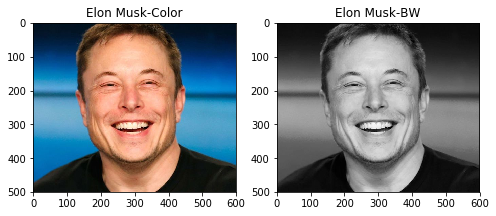

In [75]:
# Load the Face of Elon Musk
imgFaceBGR  = cv2.imread(DATA_PATH+"/images/musk.jpg")
#imgFaceBGR  = cv2.imread("imagesHT/Scarlett-Johansson-1.jpg")

imgFaceGray = cv2.cvtColor(imgFaceBGR, cv2.COLOR_BGR2GRAY)
print('Shape of Color:',imgFaceBGR.shape,'Shape of BW:',imgFaceGray.shape)
plt.subplot(121); plt.imshow(imgFaceBGR[...,::-1]); plt.title('Elon Musk-Color');
plt.subplot(122); plt.imshow(imgFaceGray); plt.title('Elon Musk-BW');

In [76]:
# # OpenCV trained classifier to detect features (eyes) automatically
# face_cascade = cv2.CascadeClassifier(DATA_PATH+"/models/haarcascade_frontalface_default.xml")
# eye_cascade = cv2.CascadeClassifier(DATA_PATH+"/models/haarcascade_eye.xml")

# faces = face_cascade.detectMultiScale(imgFaceGray, 1.3, 5)
# for (x,y,w,h) in faces:
#     cv2.rectangle(imgFaceBGR,(x,y),(x+w,y+h),color=(255,0,0),thickness=2)
#     roi_gray  = imgFaceGray[y:y+h, x:x+w]
#     roi_color = imgFaceBGR[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(imgFaceBGR,(x+ex,y+ey),(x+ex+ew,y+ey+eh),color=(0,255,0),thickness=2)

# print(eyes)
# plt.imshow(imgFaceBGR[...,::-1]); plt.title('Elon Musk-AutoDetection Eyes');        

## Accessory: Aviator Sunglasses

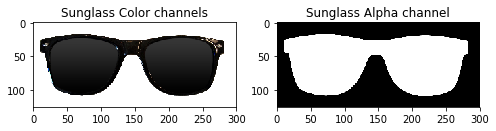

In [78]:
# Load the Images of Accessories saved in /imagesHT/
imgGlassBGR  = cv2.imread("imagesHT/sunglass-aviator.png",-1)
imgGlassR    = cv2.resize(imgGlassBGR, (300,125))
imgGlassBGR  = imgGlassR[:,:,0:3]
imgGlassMask = imgGlassR[:,:,3] 
plt.subplot(121);plt.imshow(imgGlassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(imgGlassMask,cmap='gray');plt.title('Sunglass Alpha channel');

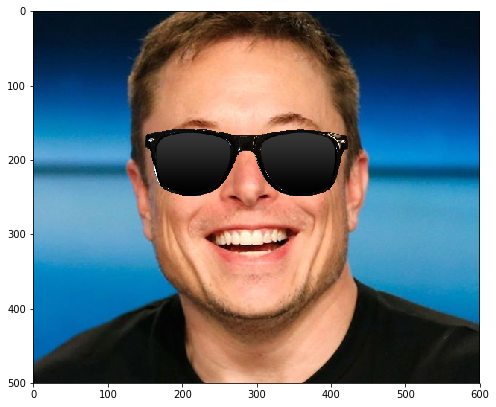

In [79]:
# Copy of image to add accessories
imgFaceBGR_dup = imgFaceBGR.copy()

# For ROI 
rstart = 140
rstop  = 265
cstart = 140
cstop  = 440 
roiInitial = imgFaceBGR_dup[rstart:rstop,cstart:cstop]

# 
imgGlassMask3 = cv2.merge((imgGlassMask,imgGlassMask,imgGlassMask))
imgGlassMask3 = np.uint8(imgGlassMask3/255)

# Mask Eye
maskedEye = cv2.multiply(roiInitial, (1-imgGlassMask3))

# Mask Glass
maskedGlass = cv2.multiply(imgGlassBGR, imgGlassMask3)

# Final ROI image
roiFinal = cv2.add(maskedEye, maskedGlass)
plt.imshow(roiFinal[...,::-1])

imgFaceBGR_dup[rstart:rstop,cstart:cstop] = roiFinal
plt.imshow(imgFaceBGR_dup[...,::-1])

## Accessory: Mustache

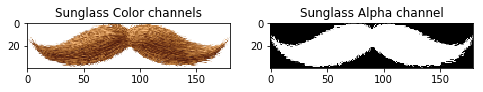

In [120]:
# Load the Images of Accessories saved in /imagesHT/
imgAccBGR  = cv2.imread("imagesHT/Mustache3.png",-1)
sizAcc     = (90,20)
sizAcc2    = (2*sizAcc[0],2*sizAcc[1])
imgAccR    = cv2.resize(imgAccBGR, sizAcc2)
imgAccBGR  = imgAccR[:,:,0:3]
imgAccMask = imgAccR[:,:,3] 
plt.subplot(121);plt.imshow(imgAccBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(imgAccMask,cmap='gray');plt.title('Sunglass Alpha channel');

(500, 600, 3)
(40, 180, 3)
(40, 180) (40, 180, 3)


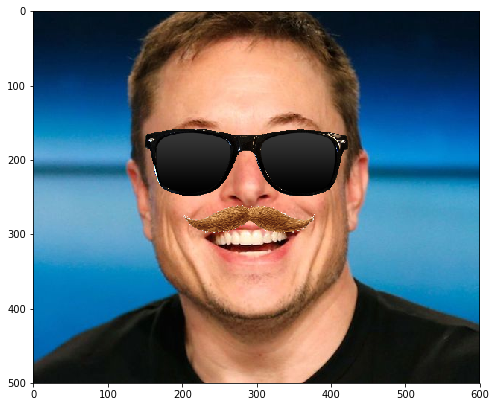

In [122]:
# Copy of image to add accessories
imgFaceBGR_dup2 = imgFaceBGR_dup.copy()
print(imgFaceBGR.shape)

# For ROI 
xyAcc  = (290,280) 
rstart = xyAcc[1]-sizAcc[1]
rstop  = xyAcc[1]+sizAcc[1]
cstart = xyAcc[0]-sizAcc[0]
cstop  = xyAcc[0]+sizAcc[0]
roiInitial = imgFaceBGR_dup2[rstart:rstop,cstart:cstop]
print(roiInitial.shape)

# Modify size of Acc
imgAccMask3 = cv2.merge((imgAccMask,imgAccMask,imgAccMask))
imgAccMask3 = np.uint8(imgAccMask3/255)
print(imgAccMask.shape,imgAccMask3.shape)


# Mask Face
maskedFace = cv2.multiply(roiInitial, (1-imgAccMask3))

# Mask Acc
maskedAcc = cv2.multiply(imgAccBGR, imgAccMask3)

# Final ROI image
roiFinal = cv2.add(maskedFace, maskedAcc)
plt.imshow(roiFinal[...,::-1])

imgFaceBGR_dup2[rstart:rstop,cstart:cstop] = roiFinal
plt.imshow(imgFaceBGR_dup2[...,::-1])